In [155]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data in a ziped file using kaggle api command
! kaggle datasets download -d meirnizri/covid19-dataset

Dataset URL: https://www.kaggle.com/datasets/meirnizri/covid19-dataset
License(s): CC0-1.0




  0%|          | 0.00/4.66M [00:00<?, ?B/s]
 21%|██▏       | 1.00M/4.66M [00:02<00:09, 396kB/s]
 43%|████▎     | 2.00M/4.66M [00:06<00:08, 316kB/s]
 64%|██████▍   | 3.00M/4.66M [00:10<00:05, 297kB/s]
 86%|████████▌ | 4.00M/4.66M [00:17<00:03, 212kB/s]
100%|██████████| 4.66M/4.66M [00:22<00:00, 188kB/s]
100%|██████████| 4.66M/4.66M [00:22<00:00, 221kB/s]


In [ ]:
# unziping loaded zip file
! unzip /content/covid19-dataset.zip

In [69]:
# read data from the csv file using pandas
data_path = 'covid19-dataset\Covid Data.csv' # here's the data path
df = pd.read_csv(data_path) # load the data into a DataFrame

# showing random 8 samples from the data
df.sample(8)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
454636,1,12,2,2,01/06/2020,2,1,53,97,2,...,2,2,1,2,2,2,2,2,3,2
626382,2,12,1,1,9999-99-99,97,2,51,2,2,...,2,2,2,2,2,2,2,2,3,97
239287,1,4,1,1,9999-99-99,97,2,40,2,2,...,2,2,2,2,2,2,2,2,7,97
888694,1,12,2,1,9999-99-99,97,2,60,97,2,...,2,2,2,2,2,2,2,1,7,97
628676,2,12,2,1,9999-99-99,97,2,35,97,2,...,2,2,2,2,2,2,2,2,3,97
889089,2,12,2,1,9999-99-99,97,2,59,97,2,...,2,2,2,2,2,2,2,2,7,97
1002806,2,12,2,1,9999-99-99,97,2,34,97,2,...,2,2,2,2,2,2,2,2,7,97
235903,2,4,2,1,9999-99-99,97,2,32,97,2,...,2,2,1,2,2,2,2,2,7,97


In [8]:
df.shape

(1048575, 21)

## Check duplicate values

In [9]:
def print_unique(df):
    for i in df.columns:
        print(f'Column {i} has {df[i].nunique()} unique values')
print_unique(df)

Column USMER has 2 unique values
Column MEDICAL_UNIT has 13 unique values
Column SEX has 2 unique values
Column PATIENT_TYPE has 2 unique values
Column DATE_DIED has 401 unique values
Column INTUBED has 4 unique values
Column PNEUMONIA has 3 unique values
Column AGE has 121 unique values
Column PREGNANT has 4 unique values
Column DIABETES has 3 unique values
Column COPD has 3 unique values
Column ASTHMA has 3 unique values
Column INMSUPR has 3 unique values
Column HIPERTENSION has 3 unique values
Column OTHER_DISEASE has 3 unique values
Column CARDIOVASCULAR has 3 unique values
Column OBESITY has 3 unique values
Column RENAL_CHRONIC has 3 unique values
Column TOBACCO has 3 unique values
Column CLASIFFICATION_FINAL has 7 unique values
Column ICU has 4 unique values


In [70]:
# select the columns that contain nan values
nan_columns = df.columns[df.isin([97,99]).any()]
nan_columns

Index(['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'ICU'], dtype='object')

In [11]:
'''
Kmean
one-hot-encoding
normalizer, standard, etc
PCA
'''

'\nKmean\none-hot-encoding\nnormalizer, standard, etc\nPCA\n'

In [106]:
def SOLVE(df):
    for col in ['INTUBED', 'PNEUMONIA', 'PREGNANT', 'ICU']:
        df[col].replace({97: 1 , 99 : 2},inplace=True)
    df.loc[:,'CLASIFFICATION_FINAL'].replace({1 : 1, 2 : 1, 3 : 1, 4 : 0 , 5 : 0 , 6 : 0 , 7 : 0},inplace=True)
    df["DEAD"] = (df["DATE_DIED"] == "9999-99-99").astype(int)
    df.drop(columns=["DATE_DIED"], inplace=True)
    df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
    df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
    df = df[(df.COPD == 1) | (df.COPD == 2)]
    df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
    df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
    df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
    df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
    df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
    df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
    df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
    df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]
    
    # df.drop_duplicates(inplace=True)
    
    # df.drop(columns=["INTUBED",'PREGNANT'],inplace=True)
    return df

In [107]:
df_solved = SOLVE(df.copy())

In [108]:
df_solved.shape

(1041013, 21)

In [109]:
df_solved.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')

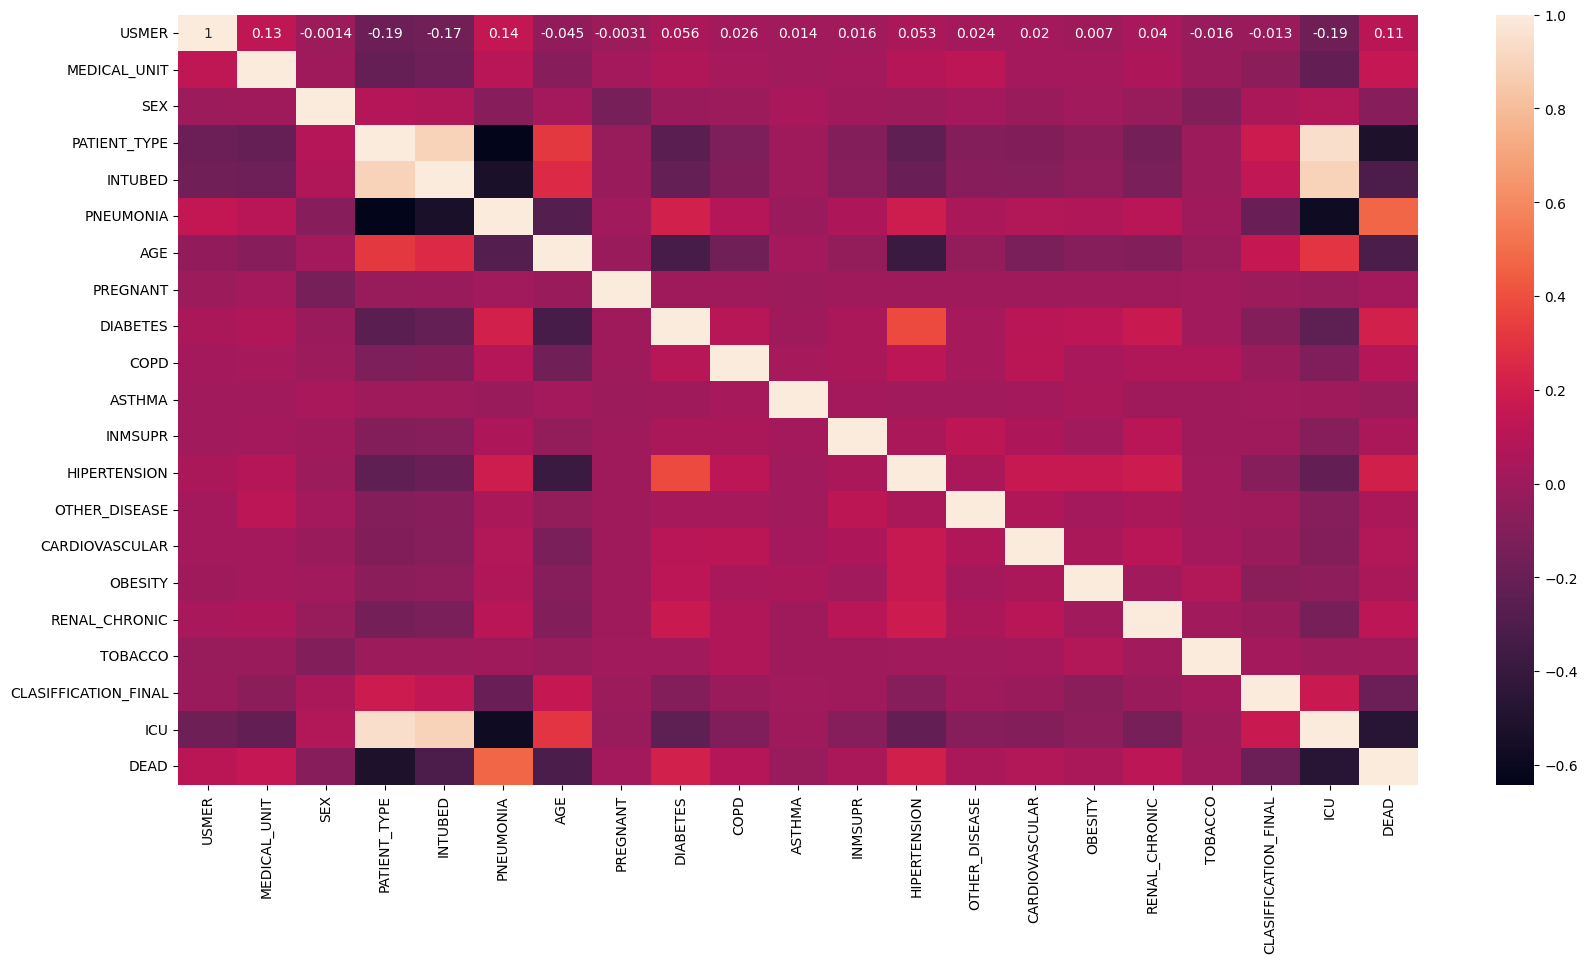

In [110]:
plt.figure(figsize=(20,10))
sns.heatmap(df_solved.corr(),annot=True)
plt.show()

In [111]:
features = ['PATIENT_TYPE','ICU','PNEUMONIA','AGE','ASTHMA','CLASIFFICATION_FINAL','DEAD']
df_solved[features].nunique()

PATIENT_TYPE              2
ICU                       2
PNEUMONIA                 2
AGE                     121
ASTHMA                    2
CLASIFFICATION_FINAL      2
DEAD                      2
dtype: int64

In [112]:
df_solved.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,1,1,65,2,2,2,...,2,1,2,2,2,2,2,1,1,0
1,2,1,2,1,1,1,72,1,2,2,...,2,1,2,2,1,1,2,0,1,0
2,2,1,2,2,1,2,55,1,1,2,...,2,2,2,2,2,2,2,1,2,0
3,2,1,1,1,1,2,53,2,2,2,...,2,2,2,2,2,2,2,0,1,0
4,2,1,2,1,1,2,68,1,1,2,...,2,1,2,2,2,2,2,1,1,0


In [115]:
X = df_solved.drop(columns = ['CLASIFFICATION_FINAL']).values
y = df_solved.CLASIFFICATION_FINAL.values#.reshape(-1, 1)

In [116]:
# Min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_solved = scaler.fit_transform(X)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42
)

In [151]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((832810, 20), (208203, 20), (832810,), (208203,))

## Feature selection (PSO).

1. Define the Problem and Objective Function
>The objective function could be the performance metric of a machine learning model (e.g., accuracy, F1-score) using a subset of features.

In [126]:
# Objective function
def objective_function(
    selected_features : list[bool],
    X = X_train, y = y_train,
    X_test = X_test, y_test = y_test
    ) -> float:
    if np.sum(selected_features) == 0:
        return 0  # Avoid empty feature subset
    X_selected = X[:, selected_features == 1]
    clf = GradientBoostingClassifier(n_estimators = 30, learning_rate=0.01)
    clf.fit(X_selected, y)
    y_pred = clf.predict(X_test[:, selected_features == 1])
    return accuracy_score(y_test, y_pred)

In [127]:
objective_function(np.ones(X_train.shape[1]))

0.6269218022795061

2. Encode Particles
> Each particle represents a subset of features. This can be encoded as a binary vector where 1 means the feature is selected and 0 means it is not.

3. Initialize Particles
> Initialize particle positions (binary vectors) and velocities (continuous values).

4. Evaluate Fitness
> Evaluate the fitness of each particle by training and validating a machine learning model using the selected features.

In [128]:
# Parameters
num_particles = 6
dimensions = X_train.shape[1]
max_iter = 10
c1 = 2.0
c2 = 2.0
w = 0.7
w_decay = 0.99

# Initialize particle positions and velocities
particles_position = np.random.randint(2, size=(num_particles, dimensions))
particles_velocity = np.random.uniform(low=-1, high=1, size=(num_particles, dimensions))
pBest_position = np.copy(particles_position)
pBest_value = np.array([objective_function(p) for p in tqdm(particles_position)])
gBest_position = pBest_position[np.argmax(pBest_value)]
gBest_value = np.max(pBest_value)


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:41<00:00, 16.97s/it]


In [129]:
print(f"Best selected features vector: {particles_position[np.argmax(pBest_value)]}")
print(f"Accuracy of best selected features vector: {gBest_value :0.3f}")

Best selected features vector: [1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1]
Accuracy of best selected features vector: 0.627


5. Update Velocities and Positions
> Update velocities and positions using PSO equations. Use a sigmoid function to convert continuous velocities into binary positions.

6. Update Personal and Global Bests
> Update the personal best positions and the global best position based on the fitness evaluations.

7. Iterate
> Repeat the update steps until the stopping criterion is met.

8. Return the Best Feature Subset
> Return the best feature subset found during the iterations.

In [130]:
# PSO main loop
for t in range(max_iter):
    for i in tqdm(range(num_particles)):
        # Update velocities
        r1 = np.random.rand(dimensions)
        r2 = np.random.rand(dimensions)
        particles_velocity[i] = (
            w * particles_velocity[i] +
            c1 * r1 * (pBest_position[i] - particles_position[i]) +
            c2 * r2 * (gBest_position - particles_position[i])
        )

        # Update positions using sigmoid function
        sigmoid = 1 / (1 + np.exp(-particles_velocity[i]))
        particles_position[i] = np.where(np.random.rand(dimensions) < sigmoid, 1, 0)

        # Evaluate fitness
        fitness = objective_function(particles_position[i])

        # Update personal best
        if fitness > pBest_value[i]:
            pBest_position[i] = particles_position[i]
            pBest_value[i] = fitness

    # Update global best
    if np.max(pBest_value) > gBest_value:
        gBest_position = pBest_position[np.argmax(pBest_value)]
        gBest_value = np.max(pBest_value)

    # Decay inertia weight
    w *= w_decay

    # Print progress
    print(f"Iteration {t+1}/{max_iter}, Global Best Value: {gBest_value:0.3f}")


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:09<00:00, 21.58s/it]


Iteration 1/10, Global Best Value: 0.627


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:56<00:00, 19.49s/it]


Iteration 2/10, Global Best Value: 0.627


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:46<00:00, 17.69s/it]


Iteration 3/10, Global Best Value: 0.627


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:57<00:00, 19.61s/it]


Iteration 4/10, Global Best Value: 0.627


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:20<00:00, 23.38s/it]


Iteration 5/10, Global Best Value: 0.627


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:36<00:00, 16.09s/it]


Iteration 6/10, Global Best Value: 0.627


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:01<00:00, 20.32s/it]


Iteration 7/10, Global Best Value: 0.627


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:03<00:00, 20.54s/it]


Iteration 8/10, Global Best Value: 0.627


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:50<00:00, 18.36s/it]


Iteration 9/10, Global Best Value: 0.627


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:09<00:00, 21.66s/it]

Iteration 10/10, Global Best Value: 0.627


In [131]:
# Results
print("Best feature subset:", gBest_position)
print("Best accuracy:", gBest_value)

Best feature subset: [1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1]
Best accuracy: 0.6269218022795061


In [132]:
selected_cols = covid_df.drop(columns = ['CLASIFFICATION_FINAL']).columns[np.array(gBest_position).astype(bool)]

print("Selected columns are:", *selected_cols.values, sep="\n")

not_selected_cols = covid_df.drop(columns = ['CLASIFFICATION_FINAL']).columns[~np.array(gBest_position).astype(bool)]
print("\nNot selected columns are:", *not_selected_cols.values, sep="\n")

Selected columns are:
USMER
SEX
DATE_DIED
PNEUMONIA
AGE
DIABETES
OTHER_DISEASE
CARDIOVASCULAR
OBESITY
ICU

Not selected columns are:
MEDICAL_UNIT
PATIENT_TYPE
INTUBED
PREGNANT
COPD
ASTHMA
INMSUPR
HIPERTENSION
RENAL_CHRONIC
TOBACCO


In [152]:
X_train = X_train[:,np.array(gBest_position).astype(np.bool_)]
X_test = X_test[:,np.array(gBest_position).astype(np.bool_)]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((832810, 10), (208203, 10), (832810,), (208203,))

## To implement Linear Discriminant Analysis (LDA) from scratch, we need to follow these steps:

1. Compute the mean vectors for each class.
2. Compute the within-class scatter matrix.
3. Compute the between-class scatter matrix.
4. Compute the eigenvectors and eigenvalues of the matrix (S_w^-1 * S_b).
5. Choose the k eigenvectors that correspond to the k largest eigenvalues to form the projection matrix W.
6. Project the samples onto the new feature subspace.

### Linear Discriminant Analysis (LDA) Equations:

#### Within-Class Scatter Matrix:
\[ S_W = sum_{c=1}^{C} sum_{i=1}^{n_c} (x_i^c - m_c)(x_i^c - m_c)^T \]
where:
- \( c \) is the class label.
- \( n_c \) is the number of samples in class \( c \).
- \( x_i^c \) is the \( i \)-th sample in class \( c \).
- \( m_c \) is the mean vector of class \( c \) samples.

#### Between-Class Scatter Matrix:
\[ S_B = \sum_{c=1}^{C} n_c (m_c - m)(m_c - m)^T \]
where:
- \( m \) is the overall mean vector of all samples.

#### Solving Eigenvalue Problem:
\[ S_W^{-1} S_B w = \lambda w \]
where:
- \( w \) is the eigenvector corresponding to the largest eigenvalue \( \lambda \).

In [169]:
class LinearDiscriminantAnalysis:
    def __init__(self):
        self.W = None
        
    def fit(self, X, y, k=5):
        # Compute class means
        self.class_means = {}
        for c in np.unique(y):
            self.class_means[c] = np.mean(X[y == c], axis=0)
        
        # Compute within-class scatter matrix
        self.S_w = np.zeros((X.shape[1], X.shape[1]))
        for c in self.class_means.keys():
            class_scatter = np.zeros((X.shape[1], X.shape[1]))
            for x in X[y == c]:
                x, mean = x.reshape(-1, 1), self.class_means[c].reshape(-1, 1)
                class_scatter += (x - mean).dot((x - mean).T)
            self.S_w += class_scatter
        
        # Compute between-class scatter matrix
        overall_mean = np.mean(X, axis=0).reshape(-1, 1)
        self.S_b = np.zeros((X.shape[1], X.shape[1]))
        for c in self.class_means.keys():
            n = X[y == c].shape[0]
            class_mean = self.class_means[c].reshape(-1, 1)
            self.S_b += n * (class_mean - overall_mean).dot((class_mean - overall_mean).T)
        
        # Compute eigenvalues and eigenvectors of (S_w^-1 * S_b)
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(self.S_w).dot(self.S_b))
        
        # Choose k eigenvectors corresponding to k largest eigenvalues
        self.W = eig_vecs[:, np.argsort(eig_vals)[::-1][:k]]
        
    def transform(self, X):
        # Transform data using LDA and return only the real part
        return np.real(np.dot(X, self.W))

In [170]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

print(X_train_lda.shape)

(832810, 5)


In [171]:
# Feature selection using Random Forest feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

rf.fit(X_train_lda, y_train)
knn.fit(X_train_lda, y_train)

# Predict the labels
y_pred_knn = knn.predict(X_test_lda)
y_pred_rf = rf.predict(X_test_lda)

In [172]:
# Evaluate the performance
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

Accuracy: 0.5985696651825382
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.70    130527
           1       0.45      0.38      0.41     77676

    accuracy                           0.60    208203
   macro avg       0.56      0.55      0.55    208203
weighted avg       0.59      0.60      0.59    208203



In [173]:
# Evaluate the performance
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

Accuracy: 0.6635543195823307
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.91      0.77    130527
           1       0.63      0.24      0.35     77676

    accuracy                           0.66    208203
   macro avg       0.65      0.58      0.56    208203
weighted avg       0.65      0.66      0.61    208203



In [182]:
# logistic
model4 = LogisticRegression(random_state=42)
model4.fit(X_train_lda,y_train)
y_pred4 = model4.predict(X_test_lda)

accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4}")

print('Classification Report:\n', classification_report(y_test, y_pred4))


# f1 = f1_score(y_test, y_pred4)
# print(f"F1 score: {f1}")
# recall = recall_score(y_test, y_pred4)
# print(f"Recall score: {recall}")
# precision = precision_score(y_test, y_pred4)
# print(f"Precision score: {precision}")
# print("Logistic F1 Score : ", f1_score(y_test, y_pred4,average=None))


Accuracy: 0.6664841524857951
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.78    130527
           1       0.64      0.24      0.35     77676

    accuracy                           0.67    208203
   macro avg       0.66      0.58      0.56    208203
weighted avg       0.66      0.67      0.62    208203



In [185]:
# randomforest
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train_lda,y_train)
y_pred1 = model1.predict(X_test_lda)

accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1}")

print('Classification Report:\n', classification_report(y_test, y_pred1))

# f1 = f1_score(y_test, y_pred1)
# print(f"F1 score: {f1}")
# recall = recall_score(y_test, y_pred1)
# print(f"Recall score: {recall}")
# precision = precision_score(y_test, y_pred1)
# print(f"Precision score: {precision}")
# print("Random Forest F1 Score : ", f1_score(y_test, y_pred1,average=None))


Accuracy: 0.6635543195823307
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.91      0.77    130527
           1       0.63      0.24      0.35     77676

    accuracy                           0.66    208203
   macro avg       0.65      0.58      0.56    208203
weighted avg       0.65      0.66      0.61    208203



In [183]:
# naive bayes
model3 = GaussianNB()
model3.fit(X_train_lda,y_train)
y_pred3 = model3.predict(X_test_lda)

accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3}")

print('Classification Report:\n', classification_report(y_test, y_pred3))

# f1 = f1_score(y_test, y_pred3)
# print(f"F1 score: {f1}")
# recall = recall_score(y_test, y_pred3)
# print(f"Recall score: {recall}")
# precision = precision_score(y_test, y_pred3)
# print(f"Precision score: {precision}")
# print("Naive Bayes F1 Score : ", f1_score(y_test, y_pred3,average=None))


Accuracy: 0.6532182533392891
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.90      0.76    130527
           1       0.59      0.24      0.34     77676

    accuracy                           0.65    208203
   macro avg       0.63      0.57      0.55    208203
weighted avg       0.64      0.65      0.61    208203



In [184]:
# xgboost
model4 = GradientBoostingClassifier(random_state=42)
model4.fit(X_train_lda,y_train)
y_pred4 = model4.predict(X_test_lda)

accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4}")

print('Classification Report:\n', classification_report(y_test, y_pred4))

# f1 = f1_score(y_test, y_pred4)
# print(f"F1 score: {f1}")
# recall = recall_score(y_test, y_pred4)
# print(f"Recall score: {recall}")
# precision = precision_score(y_test, y_pred4)
# print(f"Precision score: {precision}")
# print("XGBoost F1 Score : ", f1_score(y_test, y_pred4,average=None))


Accuracy: 0.6664841524857951
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.78    130527
           1       0.64      0.24      0.35     77676

    accuracy                           0.67    208203
   macro avg       0.66      0.58      0.56    208203
weighted avg       0.66      0.67      0.62    208203



In [190]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

preds = bst.predict(dtest)
predictions = [round(value) for value in preds]

accuracy6 = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy6}")

print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.6669164229141751
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.78    130527
           1       0.65      0.24      0.35     77676

    accuracy                           0.67    208203
   macro avg       0.66      0.58      0.56    208203
weighted avg       0.66      0.67      0.62    208203

